# Project : Solar pannel inspection system

In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob
from keras.preprocessing import image
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data collection and preparation

In [2]:
base_dir='C://cmti'

In [3]:
folders=glob('C://cmti*') # it will search for related folder
print(len(folders))

2


# Preproccesing and splitting the data

In [4]:
IMAGE_SIZE=224
BATCH_SIZE=64
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [5]:
train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)
validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
    
)

Found 243 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


# Model architecture design

In [6]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [7]:
for layer in vgg.layers:
    layer.trainable=False

In [8]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [9]:
model.summary()   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Compile the Model

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the Model

In [11]:
epoch=30
history=model.fit(train_generator,
                 steps_per_epoch=len(train_generator),
                 epochs=epoch,
                 validation_data=validation_generator,
                 validation_steps=len(validation_generator)
                 )

Epoch 1/30


4/4 [==============================] - 58s 15s/step - loss: 2.0081 - accuracy: 0.2840 - val_loss: 1.1719 - val_accuracy: 0.3333
Epoch 2/30
4/4 [==============================] - 60s 16s/step - loss: 1.2711 - accuracy: 0.3374 - val_loss: 0.9230 - val_accuracy: 0.5556
Epoch 3/30
4/4 [==============================] - 59s 15s/step - loss: 0.9411 - accuracy: 0.5473 - val_loss: 1.0200 - val_accuracy: 0.3704
Epoch 4/30
4/4 [==============================] - 59s 16s/step - loss: 0.9028 - accuracy: 0.5679 - val_loss: 0.8926 - val_accuracy: 0.5556
Epoch 5/30
4/4 [==============================] - 58s 15s/step - loss: 0.7701 - accuracy: 0.6667 - val_loss: 0.8152 - val_accuracy: 0.4815
Epoch 6/30
4/4 [==============================] - 59s 15s/step - loss: 0.7794 - accuracy: 0.5967 - val_loss: 0.8176 - val_accuracy: 0.6296
Epoch 7/30
4/4 [==============================] - 59s 15s/step - loss: 0.7166 - accuracy: 0.6626 - val_loss: 0.7850 - val_accuracy: 0.7037
Epoch 8/30
4/4 [=========

# Evaluate the Model

In [12]:
model.evaluate(validation_generator)

1/1 [==============================] - 6s 6s/step - loss: 0.4688 - accuracy: 0.9259


[0.4688011705875397, 0.9259259104728699]

In [13]:
model.predict(validation_generator)

1/1 [==============================] - 6s 6s/step


array([[1.30927905e-01, 4.82252747e-01, 3.86819363e-01],
       [1.80094197e-01, 5.67969739e-01, 2.51936078e-01],
       [3.57980840e-03, 4.75416481e-01, 5.21003664e-01],
       [7.00888634e-01, 2.26818562e-01, 7.22928196e-02],
       [7.62466550e-01, 1.38518244e-01, 9.90152210e-02],
       [6.43497109e-01, 2.72830069e-01, 8.36727619e-02],
       [1.93906108e-05, 3.08328532e-02, 9.69147801e-01],
       [1.52787820e-01, 6.47659242e-01, 1.99552909e-01],
       [5.98642468e-01, 1.67229176e-01, 2.34128371e-01],
       [2.75305569e-01, 2.14269742e-01, 5.10424733e-01],
       [1.91498976e-02, 3.74389410e-01, 6.06460631e-01],
       [8.27683866e-01, 6.53201342e-02, 1.06996074e-01],
       [3.30978725e-03, 2.65980005e-01, 7.30710149e-01],
       [7.62731791e-01, 1.41069442e-01, 9.61988345e-02],
       [1.57483315e-04, 3.18992049e-01, 6.80850506e-01],
       [5.46862423e-01, 3.78257871e-01, 7.48796985e-02],
       [5.45178809e-05, 7.57675827e-01, 2.42269680e-01],
       [1.20703507e-05, 3.72952

# Predict the Model

1/1 [==============================] - 0s 254ms/step
[[1.0000000e+00 2.4222201e-17 7.1872411e-11]]
good


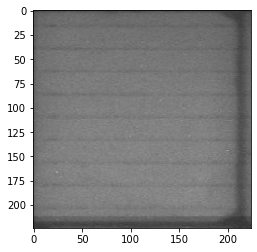

In [24]:
import matplotlib.pyplot as plt
a=image.load_img('C://cell_image2/test/Good/good_img_018.jpg',target_size=(224,224))

img_pred=image.img_to_array(a)
img_pred=np.expand_dims(img_pred,axis=0)

result=model.predict(img_pred)

print(result)
if result[0][0]>(result[0][1] or result[0][2]):
    prediction='good'
    
elif result[0][1]>(result[0][0] or result[0][2]):
    prediction='micro line'
else :
    prediction='XY crack'
print(prediction)
plt.imshow(a)
plt.show()

1/1 [==============================] - 0s 275ms/step
[[4.481545e-02 9.551761e-01 8.464872e-06]]
micro line


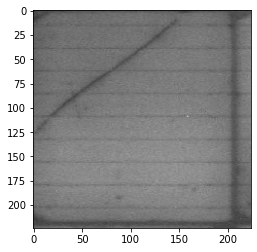

In [15]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

a=image.load_img('C://cell_image/Microline Crack/microline_img_034.jpg',target_size=(224,224))

img_pred=image.img_to_array(a)
img_pred=np.expand_dims(img_pred,axis=0)

result=model.predict(img_pred)

print(result)
c=max(result[0])
if result[0][0]>(result[0][1] or result[0][2]):
    prediction='good'
    
elif (result[0][1])>(result[0][0] or result[0][2]):
    prediction='micro line'
    
else :
    prediction='XY crack'
print(prediction)
plt.imshow(a)
plt.show()

1/1 [==============================] - 0s 254ms/step
XY crack


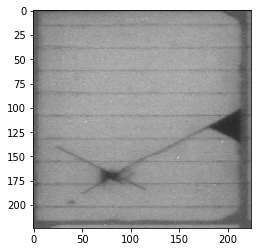

In [23]:
a=image.load_img('C://cell_image2/test/XY Crack/XY Crack_img_014.jpg',target_size=(224,224))

img_pred=image.img_to_array(a)
img_pred=np.expand_dims(img_pred,axis=0)

result=model.predict(img_pred)

#print(result)
c=max(result[0])
if result[0][0]==c:
    prediction='good'
    
elif result[0][1]==c:
    prediction='micro line'
else :
    prediction='XY crack'
print(prediction)
plt.imshow(a)
plt.show()

# Predict the Defect

1/1 [==============================] - 0s 263ms/step
good


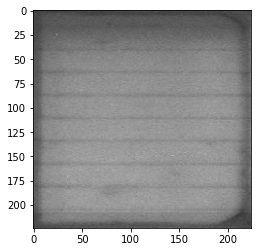

1/1 [==============================] - 0s 249ms/step
good


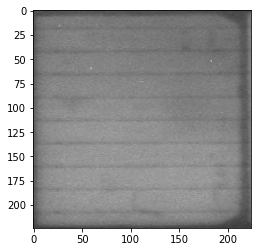

1/1 [==============================] - 0s 264ms/step
good


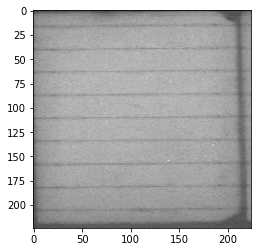

1/1 [==============================] - 0s 348ms/step
good


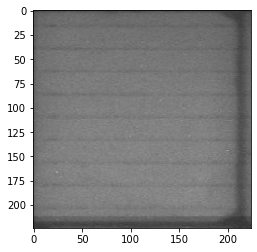

1/1 [==============================] - 0s 346ms/step
good


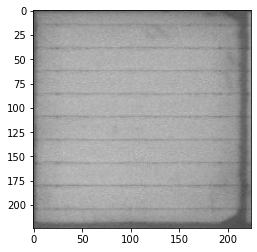

1/1 [==============================] - 0s 287ms/step
good


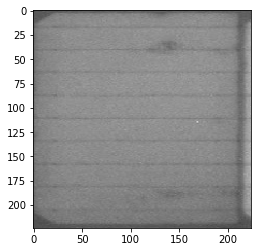

1/1 [==============================] - 0s 276ms/step
micro line


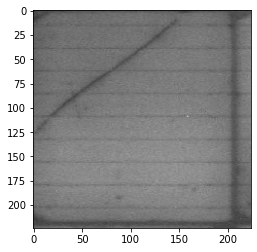

1/1 [==============================] - 0s 297ms/step
micro line


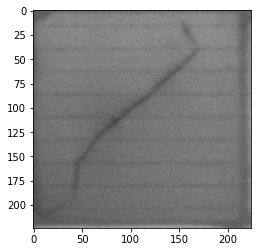

1/1 [==============================] - 0s 364ms/step
micro line


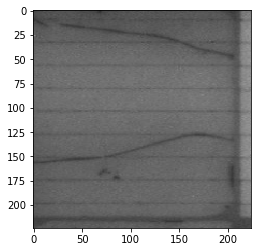

1/1 [==============================] - 0s 298ms/step
XY crack


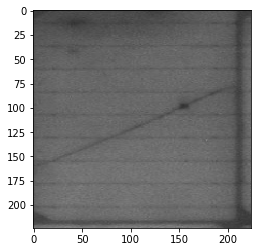

1/1 [==============================] - 0s 360ms/step
good


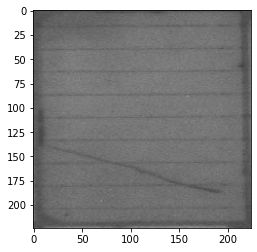

1/1 [==============================] - 0s 344ms/step
micro line


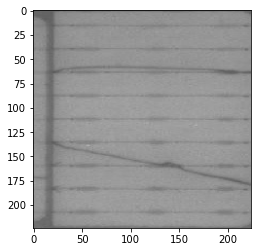

1/1 [==============================] - 0s 340ms/step
good


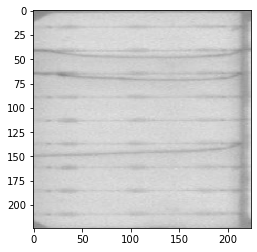

1/1 [==============================] - 0s 252ms/step
XY crack


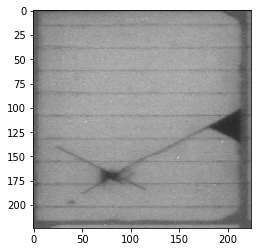

1/1 [==============================] - 0s 252ms/step
XY crack


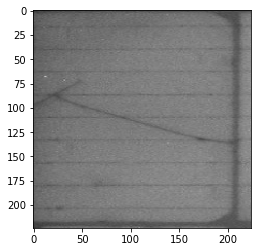

1/1 [==============================] - 0s 250ms/step
XY crack


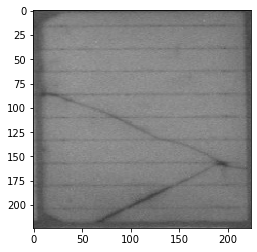

1/1 [==============================] - 0s 256ms/step
XY crack


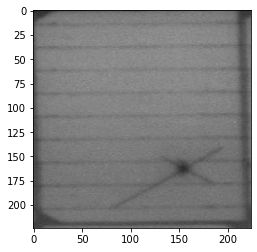

1/1 [==============================] - 0s 248ms/step
XY crack


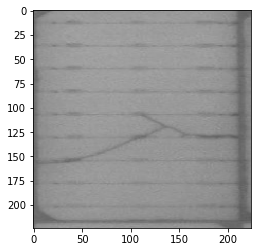

In [26]:
path="C://Users/Admin/OneDrive/Desktop/test_mix"
for i in os.listdir(path):
    impath=str(path+'//'+i)
    b=image.load_img(impath,target_size=(224,224))
    img_pred=image.img_to_array(b)
    img_pred=np.expand_dims(img_pred,axis=0)
    result=model.predict(img_pred)
    c=max(result[0])
    if result[0][0]==c:
        prediction='good'
        plt.imshow(b)
        print(prediction)
    
    elif result[0][1]==c:
        prediction='micro line'
        print(prediction)
        plt.imshow(b)
    else:
        prediction='XY crack'
        print(prediction)
        plt.imshow(b)
    plt.show()
